In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## EDA

In [3]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [4]:
df.shape

(374, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
bmi = df['BMI Category'].value_counts()
print(bmi)

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64


In [8]:
df['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [9]:
sleep_disorder = df['Sleep Disorder'].value_counts()
print(sleep_disorder
     )

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64


In [10]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

## Visualization

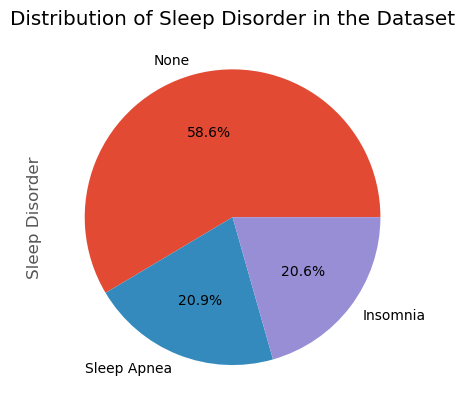

In [11]:
plt.title("Distribution of Sleep Disorder in the Dataset")
sleep_disorder.plot(kind='pie', autopct="%1.1f%%")

plt.show()

In [12]:
insomnia = df[df['Sleep Disorder'] == 'Insomnia']
sleep_apnea = df[df['Sleep Disorder'] == 'Sleep Apnea']

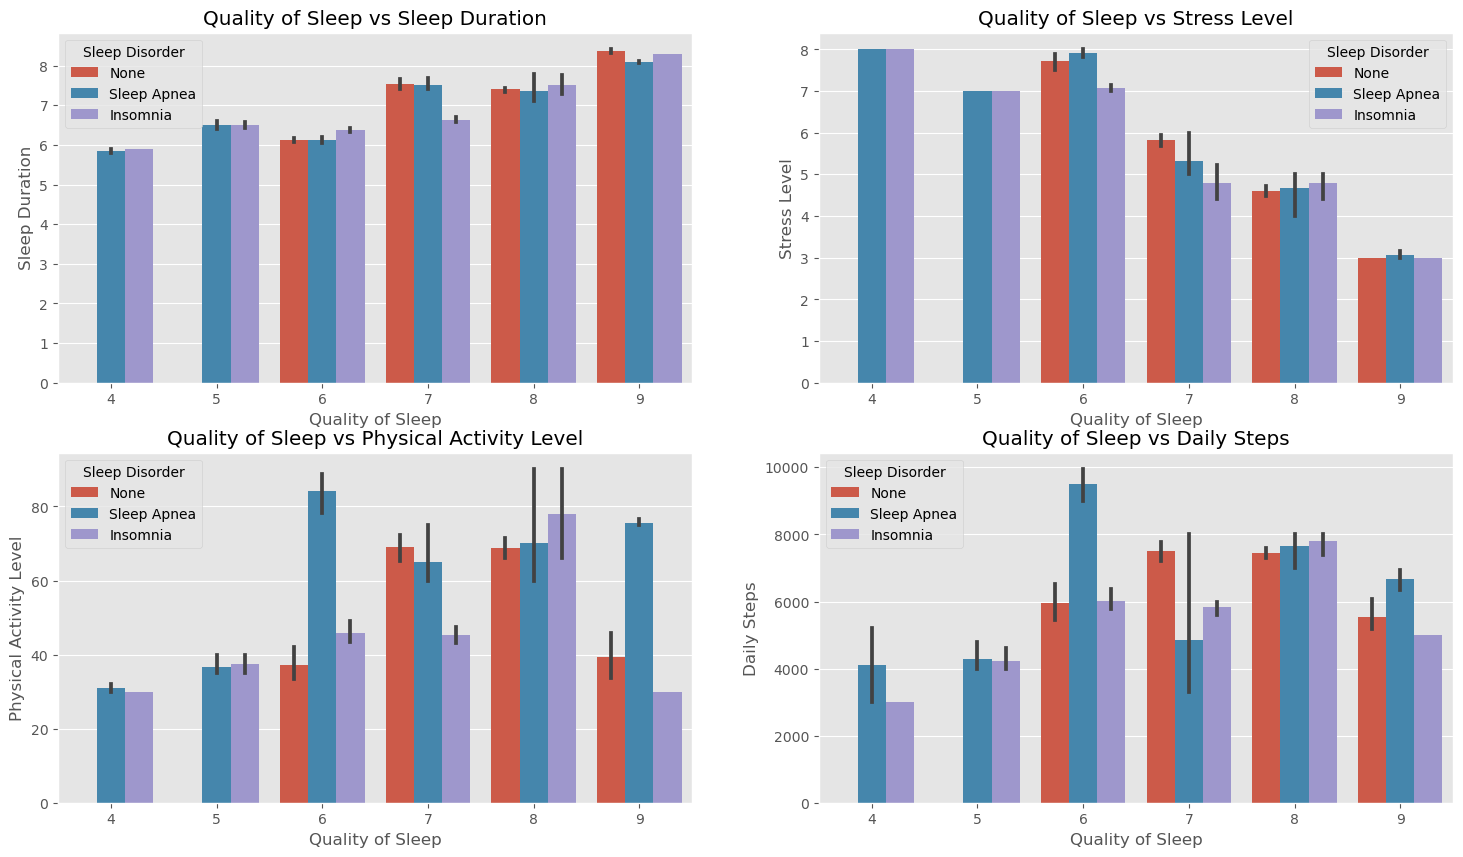

In [13]:
fig, axes = plt.subplots(2,2, figsize=(18,10))

axes[0,0].set_title("Quality of Sleep vs Sleep Duration")
sns.barplot(ax=axes[0,0] ,x=df['Quality of Sleep'], y=df['Sleep Duration'], hue=df['Sleep Disorder'])
axes[0,1].set_title("Quality of Sleep vs Stress Level")
sns.barplot(ax=axes[0,1], x=df['Quality of Sleep'], y=df['Stress Level'], hue=df['Sleep Disorder'])
axes[1,0].set_title("Quality of Sleep vs Physical Activity Level")
sns.barplot(ax=axes[1,0], x=df['Quality of Sleep'], y=df['Physical Activity Level'], hue=df['Sleep Disorder'])
axes[1,1].set_title("Quality of Sleep vs Daily Steps")
sns.barplot(ax=axes[1,1], x=df['Quality of Sleep'], y=df['Daily Steps'], hue=df['Sleep Disorder'])

plt.show()

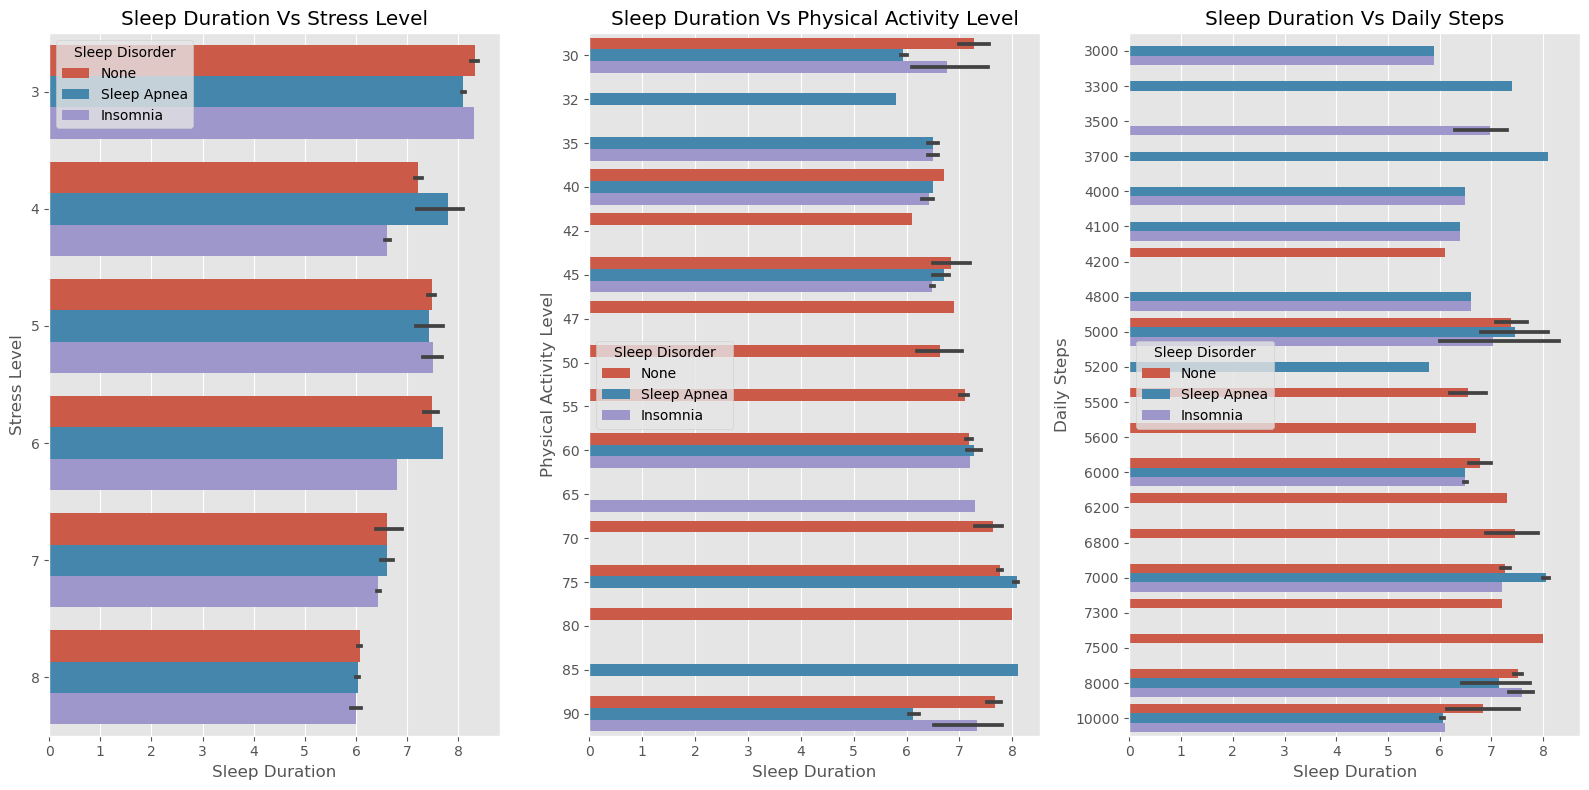

In [14]:
fig, axes = plt.subplots(1,3, figsize=(16,8))
axes[0].set_title("Sleep Duration Vs Stress Level")
sns.barplot(ax=axes[0], x=df['Sleep Duration'], y=df['Stress Level'], hue=df['Sleep Disorder'], orient='horizontal')
axes[1].set_title("Sleep Duration Vs Physical Activity Level")
sns.barplot(ax=axes[1], x=df['Sleep Duration'], y=df['Physical Activity Level'], hue=df['Sleep Disorder'], orient='horizontal')
axes[2].set_title("Sleep Duration Vs Daily Steps")
sns.barplot(ax=axes[2], x=df['Sleep Duration'], y=df['Daily Steps'], hue=df['Sleep Disorder'], orient='horizontal')

plt.tight_layout()
plt.show()

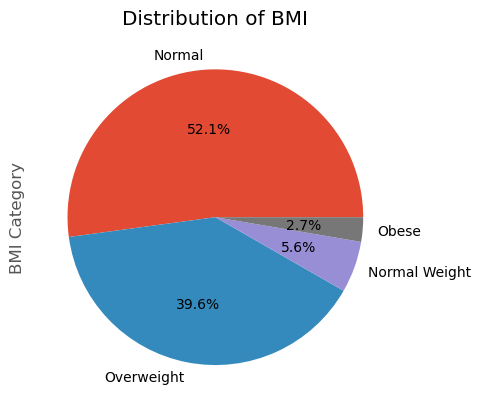

In [15]:
plt.title("Distribution of BMI")
bmi.plot(kind='pie', autopct="%1.1f%%")

plt.show()

# Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [17]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [18]:
df_for_model = df[[#'Person ID', 
        'Gender', 'Age',  
        'Sleep Duration',
        'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
        'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
        'Sleep Disorder']]
df_for_model.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [19]:
Y = df['Sleep Disorder']
X = df_for_model.drop(columns=['Sleep Disorder'])
print(Y.shape)
print(X.shape)

(374,)
(374, 10)


In [20]:
# Copy of Original X and Y
labeled_X_copy = X.copy()
labeled_Y_copy = Y.copy()

In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoding = OrdinalEncoder()

X_reshape = X[['BMI Category','Blood Pressure']]

labeled_X_copy = ordinal_encoding.fit_transform(X_reshape)

#converting encoded feature array to dataframe
labeled_X_copy = pd.DataFrame(labeled_X_copy, columns=['BMI Category', 'Blood Pressure'])

X[['BMI Category', 'Blood Pressure']] = labeled_X_copy
X.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,Male,27,6.1,6,42,6,3.0,11.0,77,4200
1,Male,28,6.2,6,60,8,0.0,9.0,75,10000
2,Male,28,6.2,6,60,8,0.0,9.0,75,10000
3,Male,28,5.9,4,30,8,2.0,22.0,85,3000
4,Male,28,5.9,4,30,8,2.0,22.0,85,3000


In [22]:
X.to_csv("/kaggle/working/mydata2.csv", index=False)

In [23]:
#dropping gender and age column too
X = X.drop(columns=['Gender', 'Age'])

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sleep Duration           374 non-null    float64
 1   Quality of Sleep         374 non-null    int64  
 2   Physical Activity Level  374 non-null    int64  
 3   Stress Level             374 non-null    int64  
 4   BMI Category             374 non-null    float64
 5   Blood Pressure           374 non-null    float64
 6   Heart Rate               374 non-null    int64  
 7   Daily Steps              374 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 23.5 KB


In [25]:
X.head()

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,6.1,6,42,6,3.0,11.0,77,4200
1,6.2,6,60,8,0.0,9.0,75,10000
2,6.2,6,60,8,0.0,9.0,75,10000
3,5.9,4,30,8,2.0,22.0,85,3000
4,5.9,4,30,8,2.0,22.0,85,3000


In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(299, 8)
(75, 8)
(299,)
(75,)


## Standardizing the dataset

In [28]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
print(X_train)

[[-1.06440378 -1.10437795 -0.62919851 ...  0.29093908  0.43911233
  -0.45036477]
 [ 0.06728748  0.55080504  0.10606864 ... -1.82734301 -0.50206751
   0.17161706]
 [-1.31589073 -1.10437795  1.57660293 ...  1.42068952  1.14499721
   2.03756256]
 ...
 [-1.31589073 -1.10437795 -1.36446565 ... -0.55637376  0.43911233
  -1.0723466 ]
 [-1.4416342  -1.10437795 -1.36446565 ... -0.98003017 -0.03147759
   0.79359889]
 [-0.058456   -0.27678645 -0.13902041 ... -0.41515495  0.43911233
  -0.45036477]]


## Training Model

In [30]:
#training model
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

#prediction
X_train_pred = model.predict(X_train)
#checking accuracy in training data
X_train_accuracy = accuracy_score(Y_train, X_train_pred)
print(X_train_accuracy)

0.9130434782608695


In [31]:
X_test_pred = model.predict(X_test)
X_test_accuracy = accuracy_score(Y_test, X_test_pred)
print(X_test_accuracy)

0.92


# Testing the Model with new inputs

In [32]:
input_data = (8.2,9,90,3,1,3,65,10000) #row no 344 in df

input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1,-1)

standard_data = scaler.transform(input_data_reshaped)
pred = model.predict(standard_data)

print(pred)

['None']


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
